In [1]:
# foia request data from propublica
# state of illinois gang database metadata - entries added per year
#    key for their database:
#   W = white or hispanic
#   B = black
#   A = 
#   U = 
#   I   

import pandas as pd

statewide_counts_path = 'data/18-1942-StatewideGangs-7_16_2018.xlsx'

gangDB = pd.read_excel(statewide_counts_path,sheet_name='gangDB')
print(gangDB)
print(gangDB.head)

    SEX RAC  EnterYear  Number
0     F   W       1993       2
1     F   B       1993       4
2     M   B       1993    1391
3     M   U       1993     197
4     M   W       1993     649
5     M   I       1993       1
6     F   B       1994      12
7     M   W       1994     636
8     F   W       1994       9
9     M   U       1994      83
10    M   A       1994       3
11    M   B       1994    1190
12    F   W       1995      17
13    M   B       1995    1239
14    F   U       1995      13
15    M   W       1995     527
16    M   A       1995       5
17    M   U       1995     722
18    F   B       1995      26
19    M   B       1996    1816
20    M   U       1996      97
21    F   U       1996       3
22    F   B       1996      52
23    M   A       1996      10
24    M   W       1996     642
25    F   W       1996      34
26    F   W       1997      29
27    M   U       1997      41
28    M   B       1997     945
29    F   B       1997      34
..   ..  ..        ...     ...
147   M 

In [2]:
# sanity check: a pandas dataframe is a list of columns:
for col in gangDB:
    print col 
    
print("")
  
for column, entries in gangDB.iteritems():   # better print out formatting
    print '{name}: {value}'.format(name=column, value=entries[0])

SEX
RAC
EnterYear
Number

SEX: F
RAC: W
EnterYear: 1993
Number: 2


In [3]:
# get the comprehensive list of races they track 

unique_identifiers = []

for entry in gangDB['RAC']:
    if not(entry in unique_identifiers):
        unique_identifiers.append(entry)

print(unique_identifiers)
    



[u'W', u'B', u'U', u'I', u'A']


In [4]:
# build a more convenient data structure for plotting
import numpy as np


N_races = len(unique_identifiers)
startYear = gangDB['EnterYear'].iloc[0]
endYear = gangDB['EnterYear'].iloc[-1]
N_years = endYear - startYear + 1
surveillanceTimeSeries = np.zeros((N_races, N_years)) # data structure for plotting entries by year for each race

year2idx = dict(zip(np.arange(startYear,endYear+1),np.arange(0,N_years))) # for convenient translation between year and index

for race_idx,race_ID in enumerate(unique_identifiers):
    for idx,val in enumerate(gangDB['RAC']):
        if race_ID==val:
            year = gangDB['EnterYear'].iloc[idx]
            yearIdx = year2idx[year]
            numEntries = gangDB['Number'].iloc[idx]
            surveillanceTimeSeries[race_idx][yearIdx] += numEntries

np.set_printoptions(precision = 3)
print(surveillanceTimeSeries)
 

[[  6.510e+02   6.450e+02   5.440e+02   6.760e+02   5.740e+02   6.390e+02
    5.430e+02   3.270e+02   4.190e+02   7.080e+02   4.370e+02   5.060e+02
    7.480e+02   8.880e+02   7.980e+02   1.036e+03   9.740e+02   8.580e+02
    6.930e+02   4.710e+02   4.620e+02   3.450e+02   3.800e+02   2.580e+02
    4.110e+02   1.490e+02]
 [  1.395e+03   1.202e+03   1.265e+03   1.868e+03   9.790e+02   1.132e+03
    7.140e+02   3.250e+02   2.290e+02   1.012e+03   2.190e+02   2.330e+02
    2.390e+02   3.350e+02   2.630e+02   3.860e+02   2.860e+02   2.320e+02
    1.500e+02   2.060e+02   1.510e+02   2.350e+02   1.820e+02   1.250e+02
    2.330e+02   1.470e+02]
 [  1.970e+02   8.300e+01   7.350e+02   1.000e+02   4.200e+01   1.460e+02
    7.900e+01   3.500e+01   3.100e+01   2.440e+02   3.400e+01   7.000e+01
    3.600e+01   4.200e+01   3.600e+01   5.800e+01   1.410e+02   7.300e+01
    3.300e+01   6.400e+01   6.300e+01   8.800e+01   7.000e+01   7.400e+01
    6.400e+01   9.400e+01]
 [  1.000e+00   0.000e+00   0.0

[u'W', u'B', u'U', u'I', u'A']


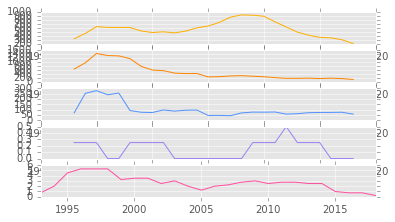

[u'W', u'B', u'U', u'I', u'A']


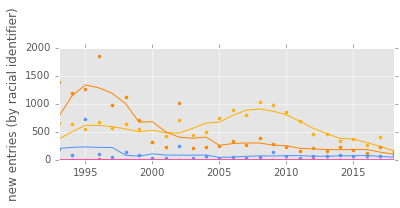

[u'W', u'B', u'U', u'I', u'A']


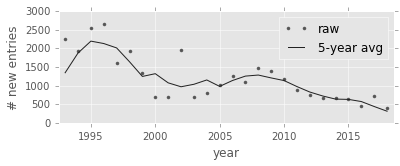

In [18]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

print(unique_identifiers)
#color_code = ['#ffb000','#fe8500','#ff509e','#9b82f3','#95d13c'] #5392ff, #71cddd # manually chosen colors 
color_code = ['#ffb000','#fe8500','#5392ff','#9b82f3','#ff509e'] # #95d13c 5392ff, #71cddd #ff509e 34bc6e# manually chosen colors (shape matched to 'unique_identifiers')

xx = np.unique(gangDB['EnterYear']) # get entry-year data for xaxis range

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

# print direct number of entries for each race, seperate subplots
fig = plt.figure()
ax = []
for idx,ID in enumerate(unique_identifiers):
    ax.append(fig.add_subplot(6,1,idx+1))
    ax[idx].plot(xx,smooth(surveillanceTimeSeries[idx][:],4),color=color_code[idx])
plt.xlim(np.min(xx),np.max(xx))
plt.show()
print(unique_identifiers)



# one subplot
fig = plt.figure(figsize=(6,2))
ax = fig.add_subplot(1,1,1)

#for idx,ID in enumerate(unique_identifiers):
#    ax.plot(surveillanceTimeSeries[idx][:],color=color_code[idx])
    
for idx,ID in enumerate(unique_identifiers):
    ax.plot(xx,smooth(surveillanceTimeSeries[idx][:],5),color=color_code[idx])
    ax.plot(xx,smooth(surveillanceTimeSeries[idx][:],1),'.',color=color_code[idx]) # raw
plt.xlim(np.min(xx),np.max(xx))
plt.ylabel('new entries (by racial identifier)')
plt.show()
print(unique_identifiers)

fig = plt.figure(figsize=(6,2))
yy_total = np.zeros(np.shape(surveillanceTimeSeries[0][:]))
for idx,ID in enumerate(unique_identifiers):
    yy_total += surveillanceTimeSeries[idx][:]

plotlines = []    
line, = plt.plot(xx,yy_total,'.',color='#555555') # dashes=[2,5])
plotlines.append(line)
line, = plt.plot(xx,smooth(yy_total,5),color='#222222')
plotlines.append(line)
plt.xlim(np.min(xx)-0.5,np.max(xx)+0.5)
plt.ylabel('# new entries')
plt.xlabel('year')
plt.legend(plotlines,('raw','5-year avg'))
plt.savefig("newentries_timeseries.svg")
plt.show()


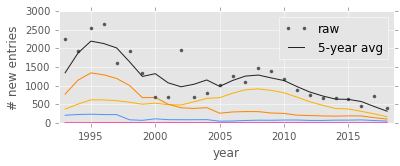

In [6]:
# one more - todo export as svg

# one subplot
fig = plt.figure(figsize=(6,2))
ax = fig.add_subplot(1,1,1)

#for idx,ID in enumerate(unique_identifiers):
#    ax.plot(surveillanceTimeSeries[idx][:],color=color_code[idx])
    
for idx,ID in enumerate(unique_identifiers):
    ax.plot(xx,smooth(surveillanceTimeSeries[idx][:],5),color=color_code[idx])
    #ax.plot(xx,smooth(surveillanceTimeSeries[idx][:],1),'.',color=color_code[idx]) # raw
plt.xlim(np.min(xx),np.max(xx))

yy_total = np.zeros(np.shape(surveillanceTimeSeries[0][:]))
for idx,ID in enumerate(unique_identifiers):
    yy_total += surveillanceTimeSeries[idx][:]

plotlines = []    
line, = plt.plot(xx,yy_total,'.',color='#555555') # dashes=[2,5])
plotlines.append(line)
line, = plt.plot(xx,smooth(yy_total,5),color='#222222')
plotlines.append(line)
plt.xlim(np.min(xx)-0.5,np.max(xx)+0.5)
plt.ylabel('# new entries')
plt.xlabel('year')
plt.legend(plotlines,('raw','5-year avg'))
plt.savefig("newentries_timeseries.svg")
plt.savefig('totals_timeseries.svg')
plt.show()


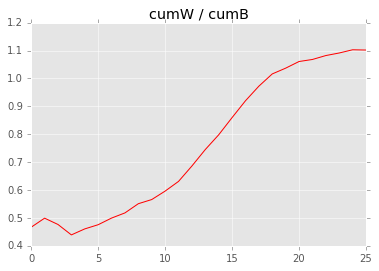

In [7]:
# ratio of W (hispanic + white) to B (african-american)


W_series = np.cumsum(surveillanceTimeSeries[0][:])
B_series = np.cumsum(surveillanceTimeSeries[1][:])

yy = []
for idx,W_val in enumerate(W_series):
    ratio = W_val / B_series[idx]
    yy.append(ratio)
fig = plt.figure()
plt.plot(yy,color = 'r')
plt.title('cumW / cumB')
plt.show()




In [8]:
# empirical difference
W_series = surveillanceTimeSeries[0][:]
B_series = surveillanceTimeSeries[1][:]
yy = []
for idx,W_val in enumerate(W_series):
    difference = W_val - B_series[idx]
    yy.append(difference)

# expected difference:
# N_B = total arrested * F_b
# N_HW = total arrested * (F_w + F_h)

# data source - https://www.census.gov/quickfacts/fact/table/il/PST045217
F_w = 0.61
F_h = 0.17
F_b = 0.15
F_hw = F_w + F_h # unhelpfully lumped together in the illinois db 
print([F_h,F_w,F_b])

estimate2010_hw = yy_total * F_hw
estimate2010_b = yy_total * F_b

estimate2010_diff = estimate2010_hw - estimate2010_b

#### estimate based on 1990 data for comparison
Fw = 8550000.0/11437000
Fh = 904000.0/11437000 # data source - https://www.census.gov/content/dam/Census/library/working-papers/2002/demo/POP-twps0056.pdf
Fb = 1694000.0/11437000
Fhw = Fw + Fh
print([Fh,Fw,Fb])

estimate1990_hw = yy_total * Fhw 
estimate1990_b = yy_total * Fb

estimate1990_diff = estimate1990_hw - estimate1990_b

[0.17, 0.61, 0.15]
[0.0790417067412783, 0.7475736644224884, 0.1481157646235901]


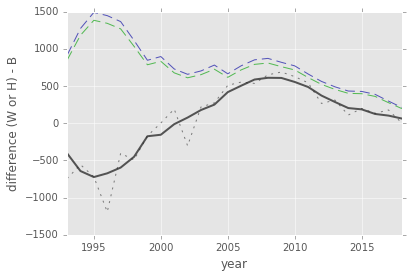

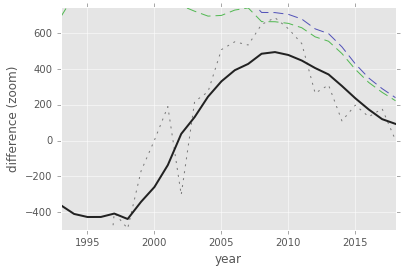

In [13]:



def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth
    
fig = plt.figure()
plt.plot(xx,yy,color = '#555555',dashes=[2,5],alpha=0.75)
plt.plot(xx,smooth(yy,5),color='#222222',linewidth=2,alpha=0.75)
plt.plot(xx,smooth(estimate2010_diff,5),color='#22aa22',alpha=0.75,dashes=[10,5])
plt.plot(xx,smooth(estimate1990_diff,5),color='#2222aa',alpha=0.75,dashes=[10,5])
plt.xlim(np.min(xx),np.max(xx))
plt.ylabel('difference (W or H) - B')
plt.xlabel('year')
plt.show()

fig = plt.figure()
plt.plot(xx,yy,color = '#555555',dashes=[2,5],alpha=0.75)
plt.plot(xx,smooth(yy,10),color='#222222',linewidth=2)
plt.plot(xx,smooth(estimate2010_diff,10),color='#22aa22',alpha=0.75,dashes=[10,5])
plt.plot(xx,smooth(estimate1990_diff,10),color='#2222aa',alpha=0.75,dashes=[10,5])
plt.xlim(np.min(xx),np.max(xx))
plt.ylim(-500,750)
plt.ylabel('difference (zoom)')
plt.xlabel('year')
plt.show()



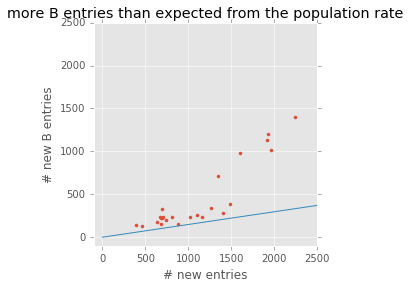

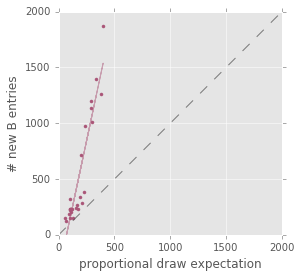

In [23]:

plt.figure()
plt.plot(yy_total[:], surveillanceTimeSeries[1][:],'.')
intercept_line = np.arange(2500)*Fb # proportional
plt.plot(intercept_line)
plt.title('more B entries than expected from the population rate')

plt.axis('square')
plt.ylim(-100,2500)
plt.xlim(-100,2500)

plt.ylabel('# new B entries')
plt.xlabel('# new entries')
plt.show()

# todo set aspect to equal and put line in upper right corner

plt.figure()
plt.plot(estimate2010_b, surveillanceTimeSeries[1][:],'.',color='#aa5577')
intercept_line = np.arange(2000)*1 # proportional
plt.plot(intercept_line,color='#555555',alpha=0.75,dashes=[10,10])

fit = np.polyfit(estimate2010_b,surveillanceTimeSeries[1][:],1)
fit_fn = np.poly1d(fit) 
plt.plot(estimate2010_b,fit_fn(estimate2010_b),color='#aa5577',alpha=0.5)

#x_fit = np.vstack([estimate2010_b, np.ones(len(estimate2010_b))]).T
#y_fit, _, _, _ = np.linalg.lstsq(x_fit, surveillanceTimeSeries[1][:])
#plt.plot(x_fit,x_fit*y_fit,color='#aa5577',alpha=0.5)

plt.axis('square')
plt.ylim(0, 2000)
plt.xlim(0, 2000)

plt.ylabel('# new B entries')
plt.xlabel('proportional draw expectation')
plt.savefig("nonproportional_selection.svg")
plt.show()


[ 0.001  1.119]


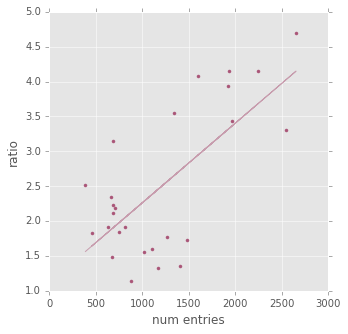

In [24]:
# abundance ratio vs number of entries

plt.figure(figsize=(5,5))
plt.plot(yy_total,surveillanceTimeSeries[1][:] / estimate2010_b,'.',color='#aa5577')
#intercept_line = np.arange(1500)*1 # proportional
#plt.plot(intercept_line,color='#555555',alpha=0.75,dashes=[10,10])

fit = np.polyfit(yy_total,surveillanceTimeSeries[1][:] / estimate2010_b,1)
print fit
fit_fn = np.poly1d(fit) 
plt.plot(yy_total,fit_fn(yy_total),color='#aa5577',alpha=0.5)

#x_fit = np.vstack([estimate2010_b, np.ones(len(estimate2010_b))]).T
#y_fit, _, _, _ = np.linalg.lstsq(x_fit, surveillanceTimeSeries[1][:])
#plt.plot(x_fit,x_fit*y_fit,color='#aa5577',alpha=0.5)

plt.ylabel('ratio')
plt.xlabel('num entries')
plt.show()

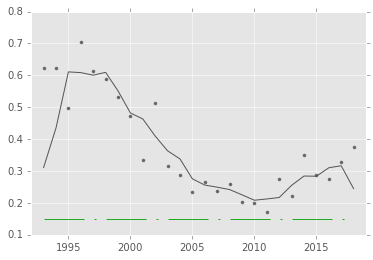

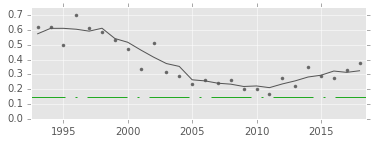

In [26]:
# fraction of additions from B vs expected


#1993 - 2018 
plt.figure() # no smoothing before division
fraction_b_raw = surveillanceTimeSeries[1][:] / yy_total
fraction_b = surveillanceTimeSeries[1][:] / yy_total
plt.plot([xx[0],xx[-1]],[Fb, Fb],color='#22aa22',dashes=[40,10,2,10])
plt.plot(xx, fraction_b_raw,'.',color='#666666')
plt.plot(xx, smooth(fraction_b,4),color="#555555")
plt.xlim(np.min(xx)-1,np.max(xx)+1)
plt.show()

#1993 - 2018
plt.figure(figsize=(6,2))  # smoothin before division (get a better estimate of the yearly rate)
fraction_b_raw = surveillanceTimeSeries[1][:] / yy_total
fraction_b = smooth(surveillanceTimeSeries[1][:],5) / smooth(yy_total,5)
plt.plot([xx[0]-1,xx[-1]+1],[Fb, Fb],color='#22aa22',dashes=[40,10,2,10])
plt.plot(xx, fraction_b_raw,'.',color='#666666')
plt.plot(xx, smooth(fraction_b,1),color="#555555")
plt.xlim(np.min(xx)-0.5,np.max(xx)+0.5)
plt.ylim(0,np.max(fraction_b_raw)+0.05)
plt.savefig("proportion_timeseries.svg")
plt.show()